In [1]:
import importlib
from utils import aspect_extraction, sentiment_extraction, general, embeddings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from tqdm import tqdm

In [2]:
importlib.reload(aspect_extraction)
importlib.reload(sentiment_extraction)
importlib.reload(general)
importlib.reload(embeddings)

<module 'utils.embeddings' from '/home/alessia/Documenti/University/Text mining and sentiment analysis/progetto/tinder/utils/embeddings.py'>

## __Tinder__

In [3]:
aspects_adjs, aspects_freq = aspect_extraction.get_aspects_adjs_and_freq()

In [4]:
aspects_polarity = sentiment_extraction.get_aspects_polarity(aspects_adjs)
aspects_score = general.normalize_series(aspects_polarity + aspects_freq)
aspects_embedding = embeddings.get_aspects_embeddings(aspects_freq)

In [5]:
def get_query_polarity_percentage(query, not_query = [], threshold=0.5, verbose=False):
    query_ranking = embeddings.get_query_similarities(
    aspects_embedding, query, not_query=not_query)
    
    query_ranking = pd.concat([aspects_score, query_ranking], axis=1).rename(columns={
        0: "score", 1: "query_similarity"}).sort_values(by=["query_similarity", "score"], ascending=False)
    query_aspects = query_ranking[query_ranking.query_similarity >= threshold].index

    pos, neg = sentiment_extraction.get_aspects_polarity_percentage(
        query_aspects, aspects_adjs, verbose=verbose)
        
    return pos, neg, query_aspects, query_ranking

__Casual sex__

In [81]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["sex", "casual"], not_query= ["couple"], threshold=0.60)

expansion: ['sex', 'casual', 'sexual', 'sexo', 'sensual', 'anal', 'erotic']


In [84]:
print(f"positive: {pos}, negative: {neg}")

positive: 51.724137931034484, negative: 48.275862068965516


In [85]:
query_ranking.head()

,score,query_similarity
sex,0.698583,0.812611
sexual,0.733324,0.792364
sexo,0.754405,0.715993
porn,0.741664,0.679251
sexy,0.768472,0.661601


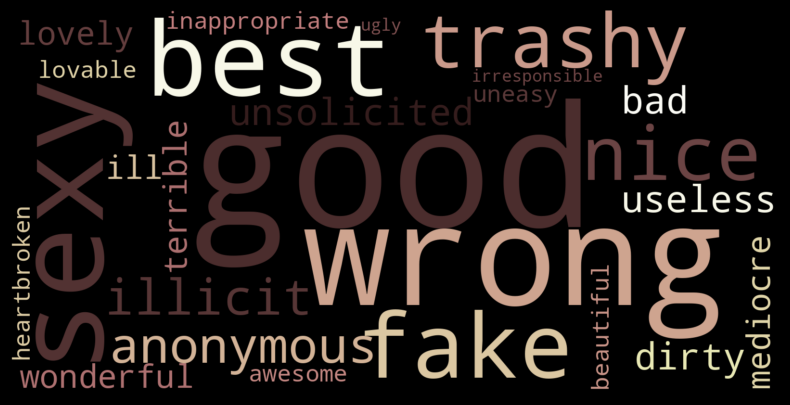

In [86]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [87]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/52 [00:00<?, ?it/s]

['gay', 'great']


In [88]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/107 [00:00<?, ?it/s]

['wrong', 'bad']


__Relationship__

In [29]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["relationship", "romantic", "couple"], not_query= ["friendship"], threshold=0.72)

expansion: ['relationship', 'romantic', 'couple', 'married', 'boyfriend', 'husband', 'date', 'couples']


In [30]:
print(f"positive: {pos}, negative: {neg}")

positive: 79.65023847376789, negative: 20.349761526232115


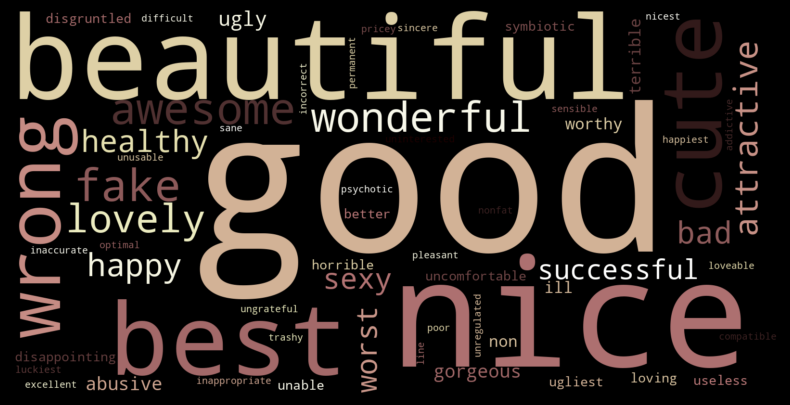

In [31]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [32]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/725 [00:00<?, ?it/s]

['beloved', 'worthy', 'gay', 'great', 'bisexual']
['happiest', 'happy']
['good', 'better']
['interested', 'interesting']
['ideal', 'like']


In [33]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/274 [00:00<?, ?it/s]

['poor', 'blind', 'needy', 'dead']
['psychotic', 'stupid', 'silly']
['wrong', 'bad']
['difficult', 'hard']
['ill', 'upset']
['disappointed', 'disappointing']
['ugliest', 'ugly']


__Friendship__

In [6]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["friendship", "friends", "networking"], not_query= ["love"], threshold=0.70)
print(f"positive: {pos}, negative: {neg}")

expansion: ['friendship', 'friends', 'networking', 'relationships', 'connections', 'relationship', 'social', 'friendships']
positive: 93.2157394843962, negative: 6.7842605156037985


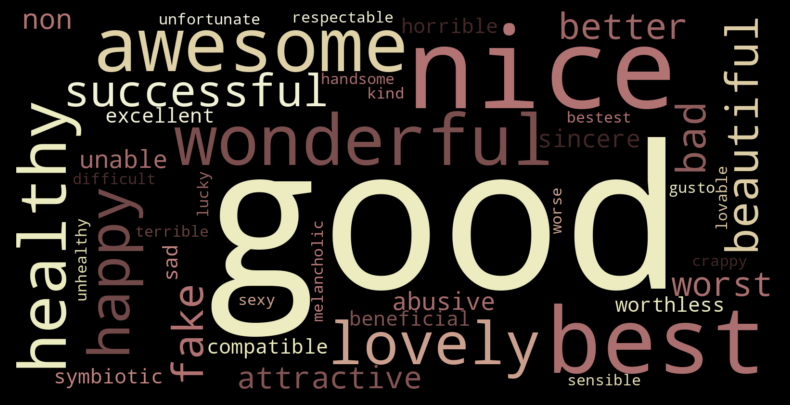

In [101]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [7]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/980 [00:00<?, ?it/s]

['dear', 'gay', 'great', 'intimate']
['good', 'plus', 'better']
['sensible', 'reasonable']
['interested', 'interesting']
['kind', 'like']


In [8]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/150 [00:00<?, ?it/s]

['stupid', 'melancholic', 'criminal', 'unfortunate']
['hard', 'difficult']
['worse', 'bad']
['dead', 'needy']
['rough', 'unknown']


__Curiosity__

In [22]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["curiosity", "exploration", "social"], not_query= ["space"], threshold=0.70)

expansion: ['curiosity', 'exploration', 'social', 'discovery', 'innovation', 'insights', 'marketing', 'acquisition']


In [23]:
print(f"positive: {pos}, negative: {neg}")

positive: 27.11864406779661, negative: 72.88135593220339


In [25]:
query_ranking.head()

,score,query_similarity
innovation,0.767381,0.800823
marketing,0.706688,0.769475
technology,0.731994,0.759639
insights,0.749532,0.733622
social,0.744084,0.712820


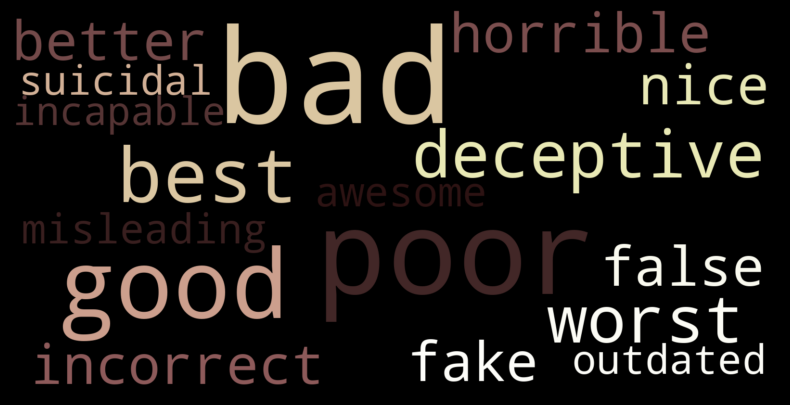

In [26]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [29]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/25 [00:00<?, ?it/s]

['good', 'better']


In [30]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/51 [00:00<?, ?it/s]

__Women__

In [46]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["women", "girls"], not_query= ["boy"], threshold= 0.74)
print(f"positive: {pos}, negative: {neg}")

expansion: ['women', 'girls', 'females', 'ladies', 'womens', 'feminists', 'models']
positive: 71.19565217391305, negative: 28.804347826086957


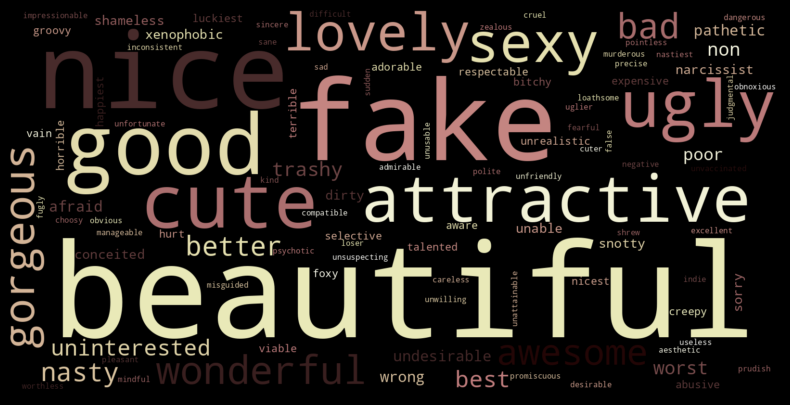

In [47]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [48]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/1765 [00:00<?, ?it/s]

['dear', 'narcissist', 'deviant', 'gay', 'great', 'intellectual', 'bisexual']
['quality', 'good', 'better']
['interested', 'interesting']
['aged', 'rich']
['possible', 'choice']
['cute', 'cuter']
['okay', 'compliment']
['horny', 'hornier']
['kind', 'like']


In [49]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/796 [00:00<?, ?it/s]

['stupid', 'undesirable', 'shrew', 'unfortunate', 'psychotic', 'loser']
['poor', 'dead', 'needy', 'lost']
['uglier', 'ugly']
['nastiest', 'nasty']
['hurt', 'cold']
['bad', 'wrong']
['hard', 'difficult']
['dumb', 'dumbest']
['conceited', 'vain']
['cheap', 'cheaper']


__Men__

In [6]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["man", "boy", "guy"], not_query=["girls", "women"], threshold= 0.84)

expansion: ['man', 'boy', 'guy', 'dude', 'he', 'brother', 'bro', 'boi']


In [7]:
print(f"positive: {pos}, negative: {neg}")

positive: 74.60496613995485, negative: 25.395033860045146


In [8]:
query_ranking.head()

,score,query_similarity
dude,0.773058,0.913715
boy,0.801145,0.886162
guy,0.924460,0.868454
man,0.901469,0.840760
bro,0.750096,0.836664


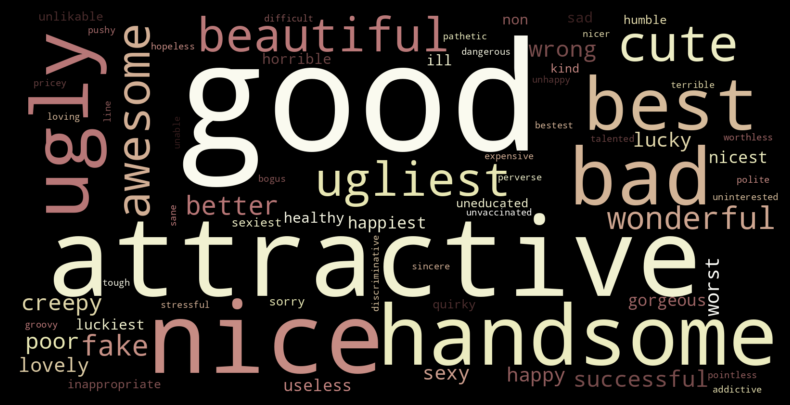

In [9]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [10]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/1004 [00:00<?, ?it/s]

['bisexual', 'great', 'gay']
['better', 'good']
['happiest', 'happy']
['sexy', 'sexiest']
['lucky', 'luckiest']
['nicer', 'nicest']
['kind', 'ideal']
['interested', 'interesting']
['rich', 'aged']


In [11]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/315 [00:00<?, ?it/s]

['stupid', 'tough', 'mortal', 'homeless']
['wrong', 'bad']
['ugliest', 'ugly']
['poor', 'sick']
['annoying', 'evil']
['upset', 'ill']
['difficult', 'hard']


__Self Esteem__

In [23]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["self", "esteem"], threshold=0.75)
print(f"positive: {pos}, negative: {neg}")

expansion: ['self', 'esteem', 'confidence', 'yourself', 'self-esteem', 'myself', 'themselves']
positive: 54.54545454545454, negative: 45.45454545454545


In [18]:
query_ranking.head()

,score,query_similarity
self,0.742616,0.862039
yourself,0.743669,0.850462
myself,0.729832,0.794236
confidence,0.755656,0.780320
esteem,0.748202,0.756709


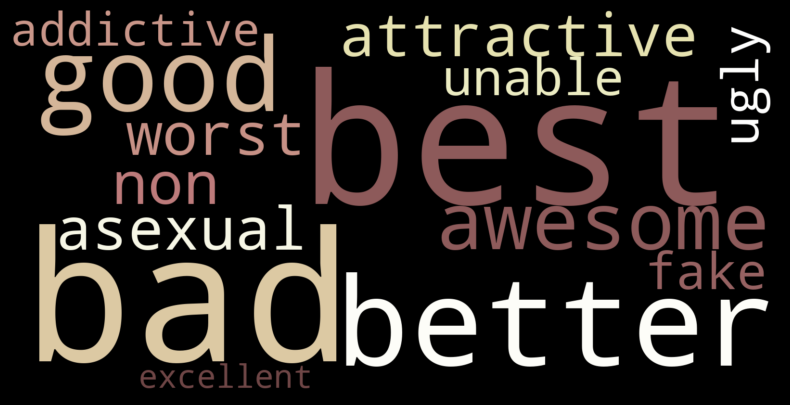

In [19]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [20]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/22 [00:00<?, ?it/s]

['better', 'good']


In [21]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/77 [00:00<?, ?it/s]

__Attractiveness (appearence)__

In [37]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["attractiveness", "appearence", "beauty"], threshold=0.55)
print(f"positive: {pos}, negative: {neg}")

expansion: ['attractiveness', 'appearence', 'beauty', 'appearance', 'apperance', 'personality', 'sexiness', 'stupidity']
positive: 53.84615384615385, negative: 46.15384615384615


In [38]:
query_ranking.head()

,score,query_similarity
appearance,0.765046,0.774414
personality,0.791893,0.741813
attractiveness,0.736023,0.695761
stupidity,0.749771,0.656400
perception,0.724084,0.581319


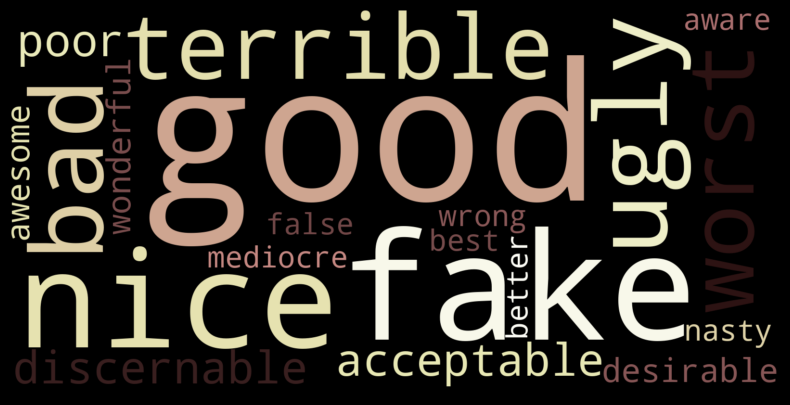

In [40]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [41]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/43 [00:00<?, ?it/s]

['plus', 'better', 'good']
['interested', 'interesting']


In [42]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/26 [00:00<?, ?it/s]

['wrong', 'bad']


__Attractiveness (intelligence)__

In [53]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["witty", "intelligence"], threshold= 0.6)
print(f"positive: {pos}, negative: {neg}")

expansion: ['witty', 'intelligence', 'intelligent', 'clever', 'humour', 'knowledge', 'profound']
positive: 25.396825396825395, negative: 74.60317460317461


In [50]:
query_ranking.head()

,score,query_similarity
intelligent,0.744974,0.778345
intelligence,0.732932,0.716737
knowledge,0.750520,0.700541
humour,0.742442,0.689580
wise,0.722925,0.668579


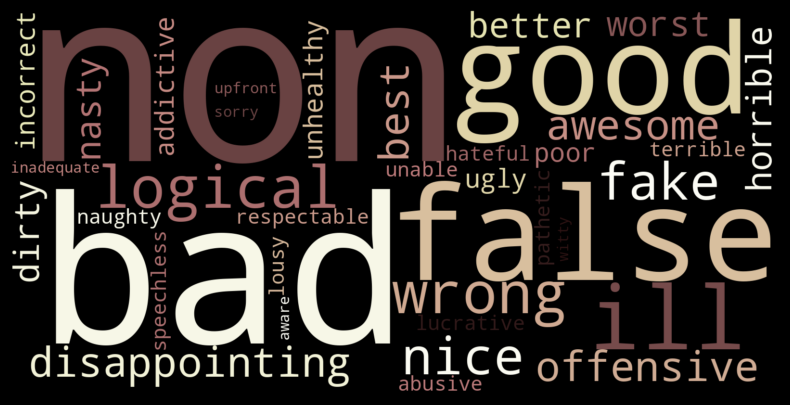

In [51]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [54]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/68 [00:00<?, ?it/s]

['plus', 'better', 'good']
['great', 'intellectual']


In [55]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/180 [00:00<?, ?it/s]

['wrong', 'bad']
['annoying', 'offensive']
